In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [7]:
obj = pd.Series([4,7,-5,3])

In [8]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [9]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [10]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [11]:
obj2 = pd.Series([4,7,-5,3],index = ['d','b','a','c'])

In [12]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [13]:
obj2['d']=6

In [14]:
obj2[['c','a','d']]

c    3
a   -5
d    6
dtype: int64

In [15]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

In [16]:
obj2*2

d    12
b    14
a   -10
c     6
dtype: int64

In [17]:
'b' in obj2

True

In [18]:
'e' in obj2

False

In [19]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [20]:
obj3= pd.Series(sdata)#通过python字典创建Series

In [21]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [23]:
obj4 = pd.Series(sdata,index = states)

In [24]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [27]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [28]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [29]:
obj4.name = 'population'

In [30]:
obj4.index.name = 'state'

In [31]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [32]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [33]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [34]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

DataFrame

In [35]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [36]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [37]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [38]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [39]:
frame2 = pd.DataFrame(data, 
                      columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four','five', 'six'])

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [41]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [42]:
frame2['state']#这是一个Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [43]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [44]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [45]:
frame2['debt'] = 16.5

In [46]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [47]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [48]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


注意：不能用frame2.eastern创建新的列。

In [49]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改全都会反映到源DataFrame上。通过Series的copy方法即可指定复制列。

In [50]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2001: 1.7,2000: 1.5, 2002: 3.6}}

In [51]:
frame3 = pd.DataFrame(pop)#外层字典的键作为列，内层键则作为行索引

In [52]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [53]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [54]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}

In [55]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


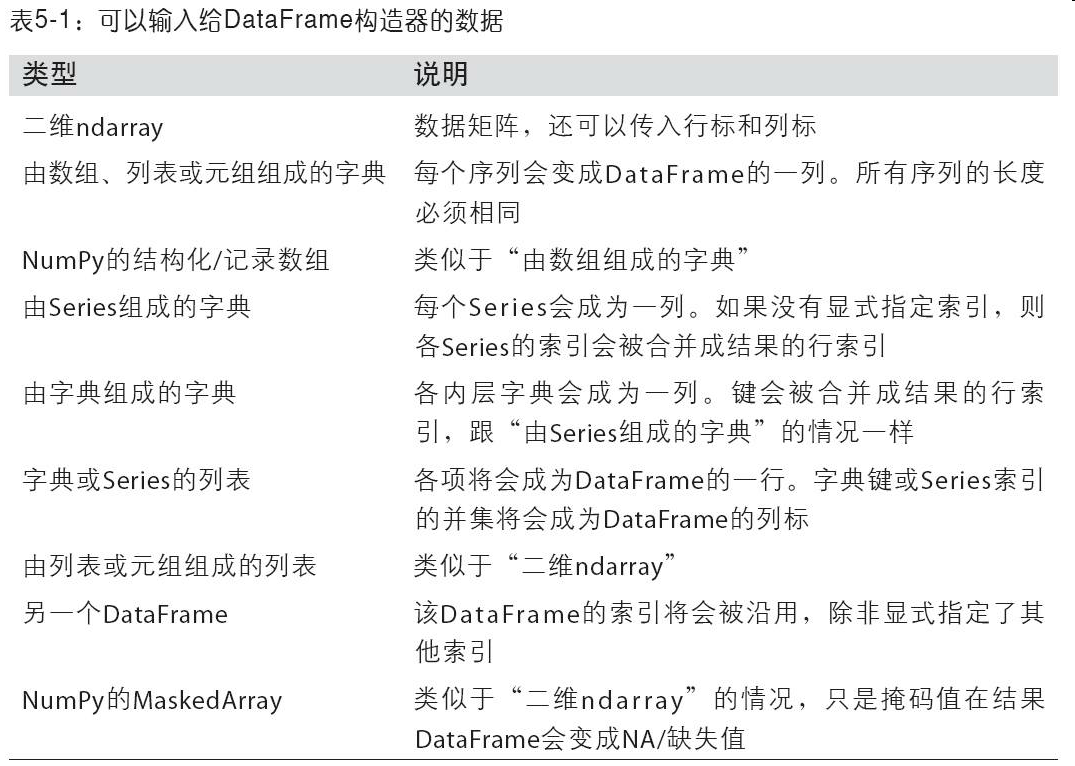

In [56]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [57]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [58]:
frame3.values#返回ndarray

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [59]:
frame2.values#返回ndarray，兼容所有列的数据类型

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

索引对象

In [60]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index

In [61]:
index[1]='d'#index对象不可变

TypeError: Index does not support mutable operations

index的不可变可以使Index对象在多个数据结构之间安全共享

In [62]:
import numpy as np
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [63]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [64]:
obj2.index is labels

True

与python的集合不同，pandas的Index可以包含重复的标签

In [65]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

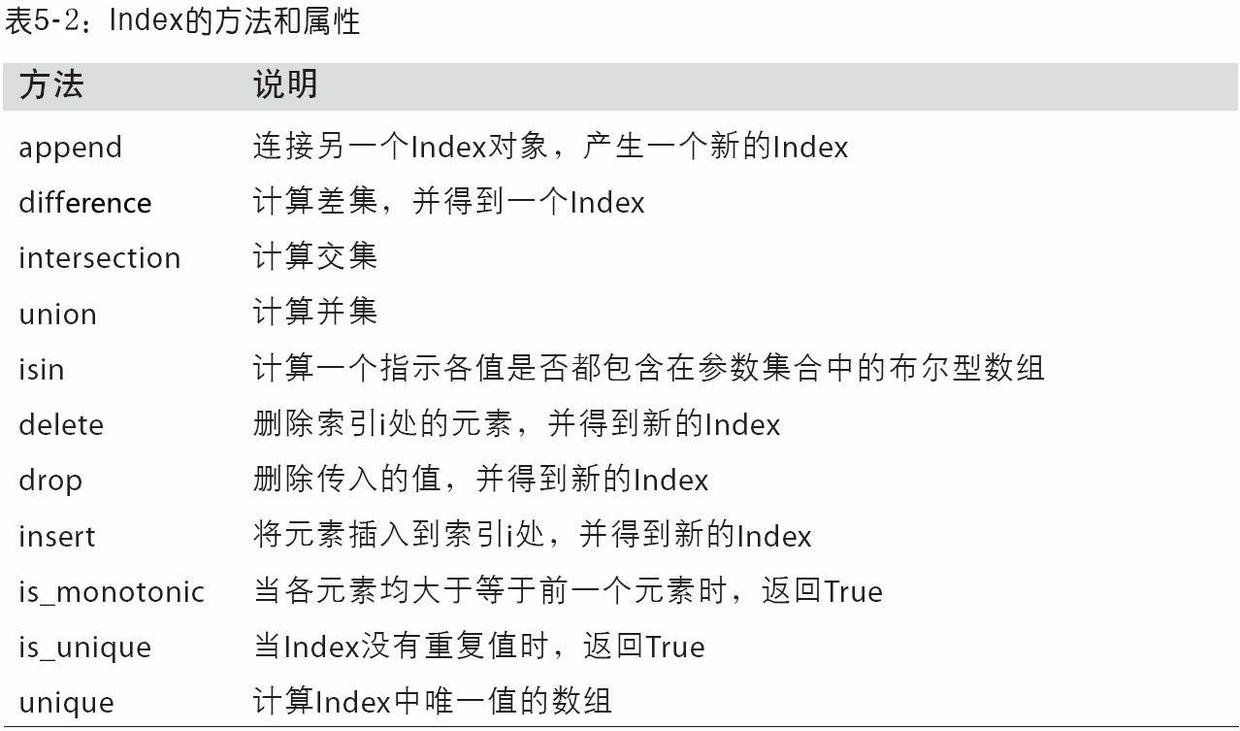

In [66]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [67]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])#reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值

In [68]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [69]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [70]:
obj3.reindex(range(6), method='ffill')#插值处理。method选项即可达到此目的，使用ffill可以实现前向值填充

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [71]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [72]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])#reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [73]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)#列可以用columns关键字重新索引

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


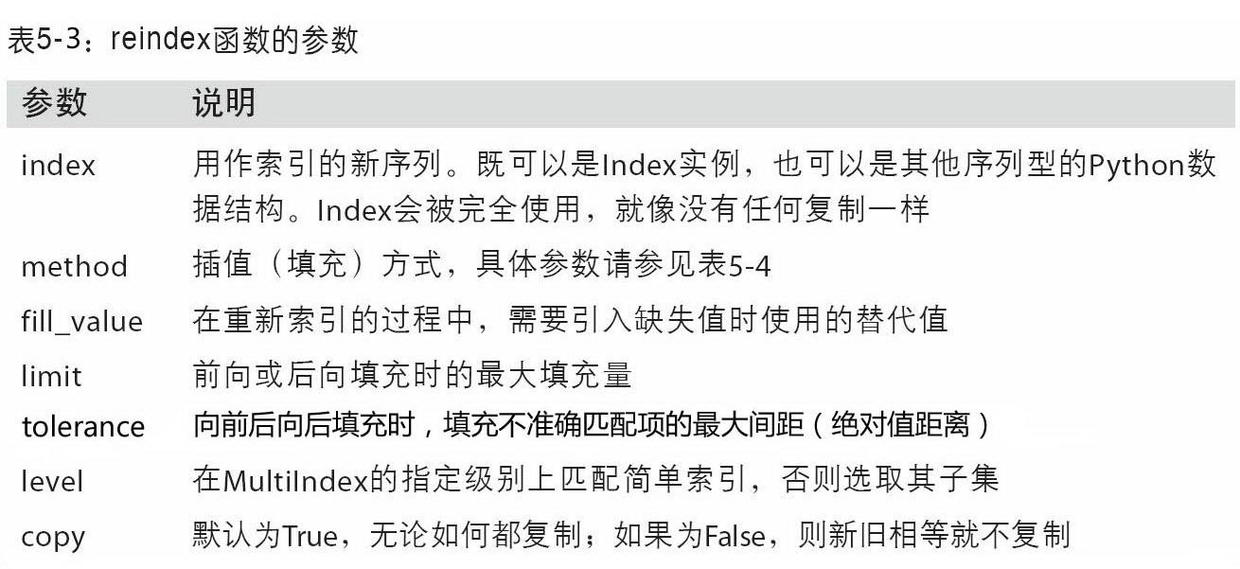

In [74]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [75]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [76]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [77]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [78]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
data.drop(['Colorado','Ohio'])#默认axis=0

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [80]:
data.drop('two', axis=1)#需要明确删除的轴（非默认）

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [81]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [82]:
obj.drop('c', inplace=True)#就地修改对象——inplace=True

In [83]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

索引、选取和过滤

In [84]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [85]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [86]:
obj[['b', 'a', 'd']]#Series的索引值不只是整数

b    1.0
a    0.0
d    3.0
dtype: float64

In [87]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [88]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [89]:
obj['b':'c'] = 5  #就地修改
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [90]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [91]:
data['two']#对DataFrame进行索引其实就是获取一个或多个列

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [92]:
data['Ohio']#用一个值或序列对DataFrame进行索引不能获取行

KeyError: 'Ohio'

In [93]:
data[:2]#切片获取行数据

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [94]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [95]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [96]:
data[data<5]=0

In [97]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


用loc和iloc进行选取

In [98]:
data.loc['Utah']#用loc对DataFrame的行的标签索引，返回Series

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [99]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [100]:
data.iloc[2, [3, 0, 1]]#花式索引

four    11
one      8
two      9
Name: Utah, dtype: int32

In [101]:
data.iloc[[1, 2], [3, 0, 1]]#返回DataFrame

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [102]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [103]:
data.one

Ohio         0
Colorado     0
Utah         8
New York    12
Name: one, dtype: int32

In [104]:
data.Ohio#只能data.column

AttributeError: 'DataFrame' object has no attribute 'Ohio'

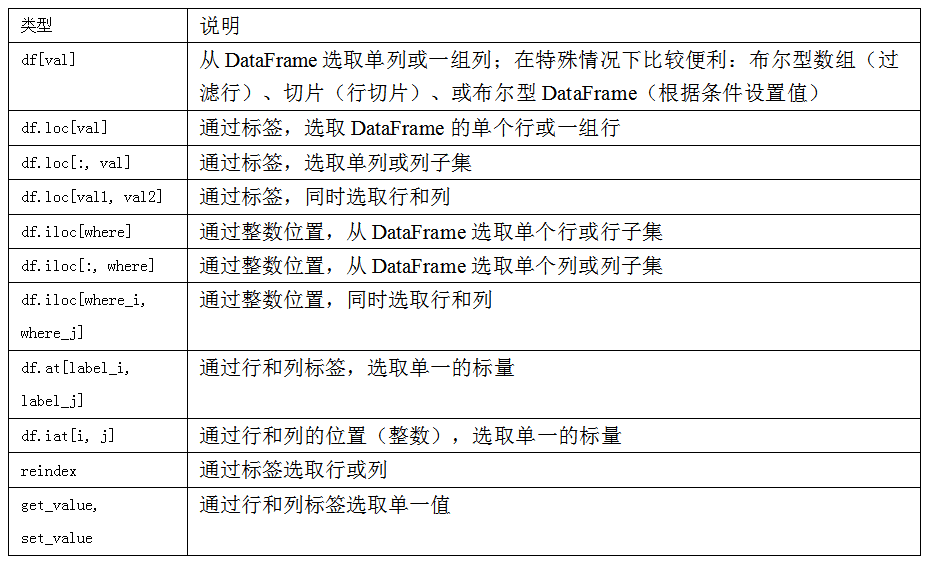

In [105]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]#对于整数索引会产生歧义

KeyError: -1

In [106]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]#对于非整数索引，不会产生歧义

2.0

In [107]:
ser.iloc[:1]#为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使用loc（标签）或iloc（整数）

0    0.0
dtype: float64

算术运算和数据对齐

pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。

In [108]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])

In [109]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [110]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [111]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [112]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [113]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [114]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [115]:
df1+df2 #ataFrame对象相加，没有共用的列或行标签，结果都会是空

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


在算术方法中填充值

In [116]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [117]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [118]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [119]:
df1.add(df2,fill_value=0)#当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值0

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


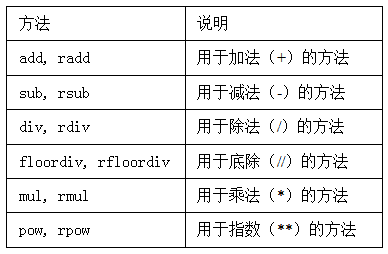

In [120]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


DataFrame和Series之间的运算

In [121]:
arr = np.arange(12.).reshape((3, 4))
arr - arr[0]#当我们从arr减去arr[0]，每一行都会执行这个操作,这就叫做广播（broadcasting）

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [123]:

frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
columns=list('bde'),
index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [124]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [125]:
frame - series#boardcast

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [126]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2 #如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [127]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [128]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [129]:
frame.sub(series3)#subtraction,but matching the column by default

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
frame.sub(series3,axis='index')#subtraction, hope to match the index by using(axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


函数应用和映射

In [131]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [132]:
frame

,b,d,e
Utah,-0.180734,-1.053153,-0.217880
Ohio,0.720397,0.037245,0.306304
Texas,-0.176715,-0.909161,-1.492472
Oregon,0.085204,-0.462764,-1.577612


In [133]:
np.abs(frame)

,b,d,e
Utah,0.180734,1.053153,0.217880
Ohio,0.720397,0.037245,0.306304
Texas,0.176715,0.909161,1.492472
Oregon,0.085204,0.462764,1.577612


In [134]:
f = lambda x : x.max() - x.min() #function: calculating the difference between the max and the min within a Series
frame.apply(f)#matching the index by default

b    0.901131
d    1.090398
e    1.883916
dtype: float64

In [135]:
frame.apply(f,axis='columns')# x belongs to 'bde'

Utah      0.872420
Ohio      0.683152
Texas     1.315757
Oregon    1.662816
dtype: float64

In [136]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])# function can return several values

In [137]:
frame.apply(f)

,b,d,e
min,-0.180734,-1.053153,-1.577612
max,0.720397,0.037245,0.306304


In [138]:
format = lambda x: '%.2f' % x #change the format(Python function)
frame.applymap(format)

,b,d,e
Utah,-0.18,-1.05,-0.22
Ohio,0.72,0.04,0.31
Texas,-0.18,-0.91,-1.49
Oregon,0.09,-0.46,-1.58


In [139]:
frame['e'].map(format)#Series 用于应用元素级函数的map方法

Utah      -0.22
Ohio       0.31
Texas     -1.49
Oregon    -1.58
Name: e, dtype: object

排序和排名

In [140]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()#对行或列索引进行排序（按字典顺序）

a    1
b    2
c    3
d    0
dtype: int64

In [141]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
index=['three', 'one'],
columns=['d', 'a', 'b', 'c'])

In [142]:
frame.sort_index()#sort the index by default

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [143]:
frame.sort_index(axis='columns')#hoping to sort the columns in ascending order by default

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [144]:
frame.sort_index(axis='columns',ascending=False)#hoping to sort the columns in descending order

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [145]:
obj = pd.Series([4,7,-3,2])
obj.sort_values()# sort the Series

2   -3
3    2
0    4
1    7
dtype: int64

In [146]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()#任何缺失值默认都会被放到Series的末尾

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [147]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [148]:
frame.sort_values(by='b')#根据一个或多个列中的值进行排序(by选项)

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [149]:
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [150]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()#为各组分配一个平均排名

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [151]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [152]:
obj.rank(ascending=False,method='max')#'max'——平级时取最大值

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [153]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
'c': [-2, 5, 8, -2.5]})
frame.sort_index(axis='columns')

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [154]:
frame.rank(axis='columns').sort_index(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


带有重复标签的轴索引

In [155]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [156]:
obj.index.is_unique

False

In [157]:
obj['a']

a    0
a    1
dtype: int64

In [158]:
obj['c']

4

In [159]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.348477,-0.741381,-0.249437
a,-0.373396,0.919642,-0.312520
b,-0.032067,0.582926,-0.382734
b,-2.337147,1.668112,0.426041


In [160]:
df.loc['b']

,0,1,2
b,-0.032067,0.582926,-0.382734
b,-2.337147,1.668112,0.426041


汇总和计算描述统

In [161]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
[np.nan, np.nan], [0.75, -1.3]],
 index=['a', 'b', 'c', 'd'],
columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [162]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [163]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [164]:
df.idxmax()

one    b
two    d
dtype: object

In [165]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [166]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [167]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [168]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

唯一值、值计数以及成员资格

In [173]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [174]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [175]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [176]:
pd.value_counts(obj.values, sort=False)

c    3
d    1
b    2
a    3
dtype: int64

In [177]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [178]:
mask = obj.isin(['b', 'c'])

In [179]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [180]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [181]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [182]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [183]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [184]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
'Qu2': [2, 3, 1, 2, 3],'Qu3': [1, 5, 2, 4, 4]})

In [185]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [186]:
result = data.apply(pd.value_counts).fillna(0)

In [187]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
